## 1. Calibration result

In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
import ast
import random
import glob

In [4]:
path = './Data/calibration_resultData/'
round1_result = pd.read_csv(path + "round1_result.csv")
round2_result = pd.read_csv(path + "round2_result.csv")
round3_result = pd.read_csv(path + "round3_result.csv")

In [5]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

def parallel_coordinate_plot(df, color_index, size = [10,6]):
    df = df.sort_values(by='Uncertainty_round', ascending=True)
    
    data = df[['g_time', 'act', 'g_per']]
    ys = data.values
    ynames = ['G_duration', 'Activity', 'G_proportion']

    ymins = ys.min(axis = 0)
    ymaxs = ys.max(axis = 0)

    dys = ymaxs - ymins
    # ymins -= dys * 0.1  # add 5% padding below and above
    ymins = np.array([30, 0.05, 0.1])  # add 5% padding below and above
    # ymaxs += dys * 0.1
    ymaxs = np.array([300, 0.5, 1.0])

    ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    fig, host = plt.subplots(figsize=(size[0],size[1]))

    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.tick_params(labelsize=18)  # 눈금 레이블 크기 조절
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))


    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=20)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    # host.set_title('Parallel Coordinates Plot', fontsize=18, pad=12)

    #colors = plt.cm.Set2.colors
    colors = plt.cm.viridis.colors
    #colors = plt.cm.plasma.colors
    #colors = plt.cm.inferno.colors
    #colors = plt.cm.magma.colors

    #color
    target_names = pd.unique(df['Uncertainty_round'])
    target_names = target_names.astype(str)
    legend_handles = [None for _ in target_names]      

    unique_uncertain = sorted(df['Uncertainty_round'].unique().tolist(), reverse= True)
    # 'C' 열을 생성하고, 'B' 열의 값을 'unique_vals' 리스트에서의 인덱스로 변경
    df['target'] = df['Uncertainty_round'].replace(unique_uncertain, range(len(unique_uncertain)))

    uncertainty_value = df['target'].values #array 변환

    for j in range(ys.shape[0]):
        # create bezier curves
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                         np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, alpha=0.7, edgecolor=colors[int(uncertainty_value[j])*color_index]) #color 조정. 여기 숫자를 변경하면 됌. int(uncertainty_value[j] * 40)
        legend_handles[int(uncertainty_value[j])] = patch
        host.add_patch(patch)

    host.legend(legend_handles, target_names,
                loc='lower center', bbox_to_anchor=(0.5, -0.18),
                ncol=len(target_names), fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

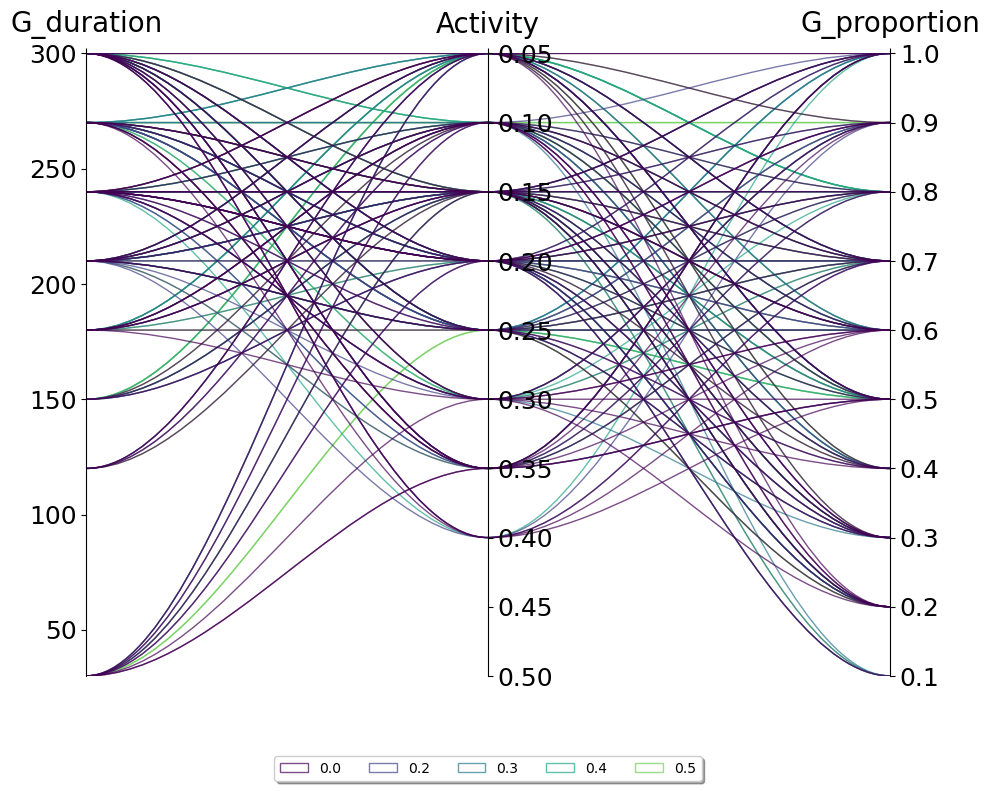

In [6]:
parallel_coordinate_plot(round1_result, 50, size = [10,8])

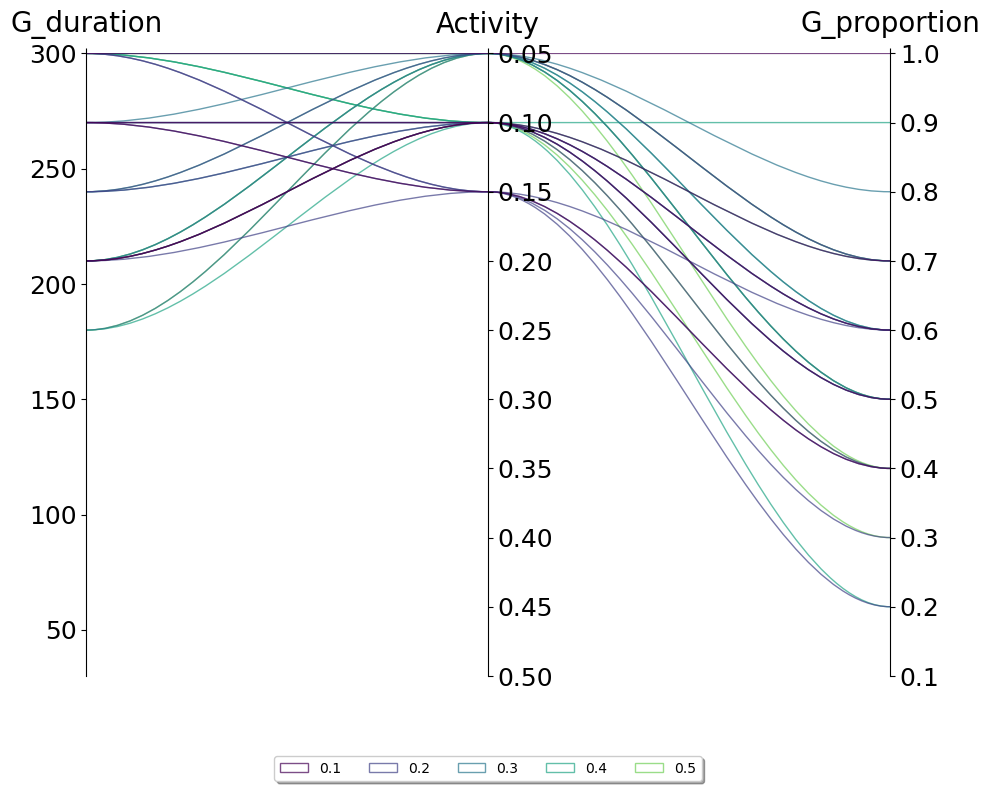

In [7]:
parallel_coordinate_plot(round2_result, 50, [10,8])

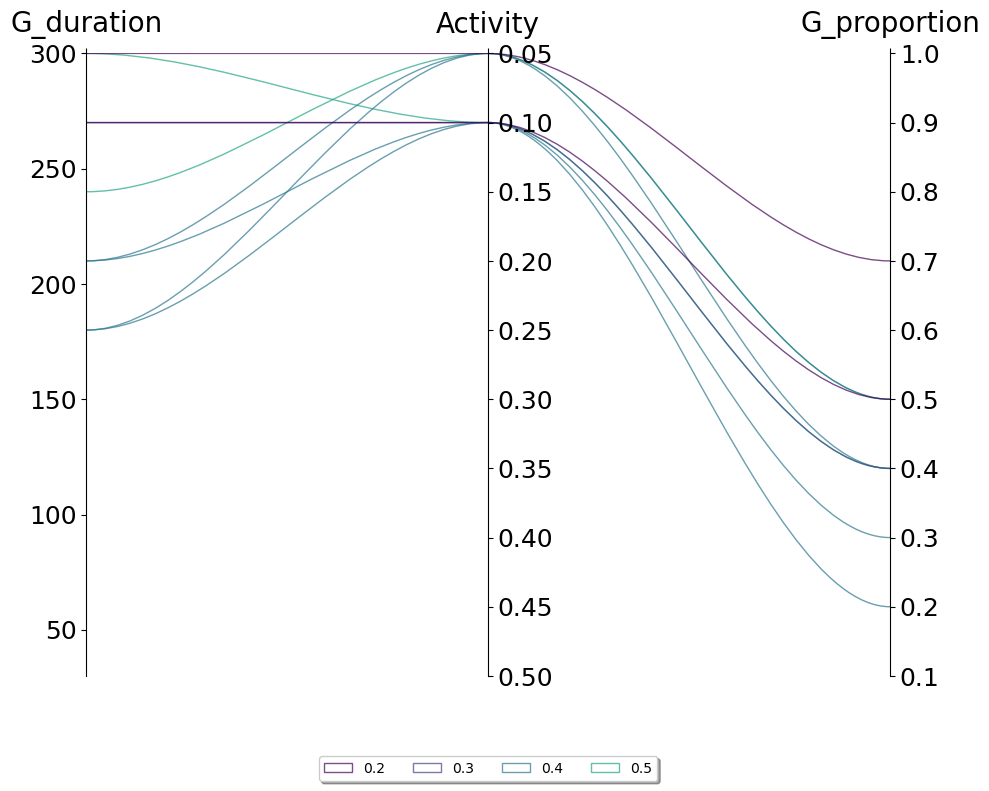

In [8]:
parallel_coordinate_plot(round3_result, 50, [10,8])

## 2. Parameter combinations by uncertainty index

In [9]:
print(pd.unique(round1_result['Uncertainty_round']))
print(pd.unique(round2_result['Uncertainty_round']))
print(pd.unique(round3_result['Uncertainty_round']))
print(len(round1_result))
print(len(round2_result))
print(len(round3_result))

[0.5 0.4 0.2 0.  0.3]
[0.1 0.3 0.2 0.4 0.5]
[0.3 0.2 0.4 0.5]
194
29
9


In [10]:
print(len(round1_result[round1_result['Uncertainty_round'] == 0.5]))
print(len(round1_result[round1_result['Uncertainty_round'] == 0.4]))
print(len(round1_result[round1_result['Uncertainty_round'] == 0.2]))
print(len(round1_result[round1_result['Uncertainty_round'] == 0.]))
print(len(round1_result[round1_result['Uncertainty_round'] == 0.3]))

67
22
26
46
33


In [11]:
print(len(round2_result[round2_result['Uncertainty_round'] == 0.]))
print(len(round2_result[round2_result['Uncertainty_round'] == 0.1]))
print(len(round2_result[round2_result['Uncertainty_round'] == 0.2]))
print(len(round2_result[round2_result['Uncertainty_round'] == 0.3]))
print(len(round2_result[round2_result['Uncertainty_round'] == 0.4]))
print(len(round2_result[round2_result['Uncertainty_round'] == 0.5]))

0
5
5
6
8
5


In [12]:
print(len(round3_result[round3_result['Uncertainty_round'] == 0.]))
print(len(round3_result[round3_result['Uncertainty_round'] == 0.1]))
print(len(round3_result[round3_result['Uncertainty_round'] == 0.2]))
print(len(round3_result[round3_result['Uncertainty_round'] == 0.3]))
print(len(round3_result[round3_result['Uncertainty_round'] == 0.4]))
print(len(round3_result[round3_result['Uncertainty_round'] == 0.5]))

0
0
2
4
1
2


## 3. Check overfitting: train and test dataset at each round

In [13]:
# Truecount = C, count = R in algorithm

def count_comb_T(df, column):
    df = df.copy()
    grouped = df.groupby(['g_time', 'act', 'g_per'])[column].agg([('count', 'size'), ('TrueCount', lambda x: sum(x))])
    result = grouped.reset_index()[['g_time', 'act', 'g_per', 'count', 'TrueCount']]
    # result = result[result['TrueCount'] > 0]
    
    #reliability and uncertainty
    result['reliability'] = result['TrueCount'] / result['count']
    result['Uncertainty'] = 1 - result['reliability']   
    
    return result

# extract combination
def combination_extract(comb_df, target_df):

    # generate combinations with a,b,c columns in df1
    comb_1 = comb_df.apply(lambda x: tuple(x[['g_time', 'act', 'g_per']]), axis=1)

    # generate combinations with a,b,c columns in df2
    comb_2 = target_df.apply(lambda x: tuple(x[['g_time', 'act', 'g_per']]), axis=1)

    # check the combination in df2 exists in df1, if it is -> extract
    selected_comb = [comb for comb in comb_1 if comb in set(comb_2)]

    # generate df3 with extracted combination
    result_df = target_df[target_df.apply(lambda x: tuple(x[['g_time', 'act', 'g_per']]), axis=1).isin(selected_comb)]
    result_df.reset_index(drop = True)
    
    return result_df

In [15]:
# data
# train, test data
Path = './Data/ObservedData/test_trainData/'

trainY1 = np.loadtxt(Path + "train_data_forY1_80.txt")
trainY2 = np.loadtxt(Path + "train_data_forY2_80.txt")
trainY3 = np.loadtxt(Path + "train_data_forY3_80.txt")

testY1 = np.loadtxt(Path + "test_data_forY1_20.txt")
testY2 = np.loadtxt(Path + "test_data_forY2_20.txt")
testY3 = np.loadtxt(Path + "test_data_forY3_20_2.txt")

In [30]:
def openfile(path, search_term):

    # 해당 경로에 있는 모든 csv 파일 목록을 가져옵니다.
    csv_files = glob.glob(path + "/*.csv")

    # 검색어가 포함된 파일만 골라서 읽습니다.
    selected_files = [file for file in csv_files if search_term in file]
    df_list = [pd.read_csv(file) for file in selected_files]

    # 여러 파일을 하나로 합칩니다.
    merged_df = pd.concat(df_list, ignore_index=True)
    return merged_df

def multiple_dupl(df, y_col, t): #t -> duplicate result
    y_lst = []
    for i in range(len(df)):
        y = df.loc[i, y_col]
        y = ast.literal_eval(y)  #str -> list
        y = times(y, t)
        
        y_lst.append(y)
    
    df[y_col] = y_lst
    return df

def times(lst, t):
    new_list = []
    for item in lst:
        for i in range(t):
            new_list.append(item)
    return new_list


In [34]:
# simulation result data with calibrated parameters 
dataPath = './Data/simulData/runWithCalibratedParameters/'
result = openfile(dataPath, 'run')
result.reset_index(inplace = True, drop = True)
result = result.drop('Unnamed: 0', axis = 1)
result.shape   # combined simulation result

(1940, 6)

In [35]:
result.head()

,g_time,act,g_per,y1,y2,y3
0,30,0.05,0.4,"[6, 3, 4, 6, 9, 3, 1, 4, 12, 1, 6, 1, 3, 6, 6,...","[12, 13, 3, 5, 6, 6, 6, 4, 8, 4, 7, 4, 6, 8, 5...","[15, 19, 7, 12, 15, 7, 12, 14, 11, 5]"
1,30,0.05,0.4,"[3, 1, 1, 1, 2, 2, 1, 8, 4, 5, 3, 6, 4, 4, 5, ...","[13, 9, 5, 20, 4, 11, 4, 5, 8, 8, 4, 4, 5, 3, ...","[19, 28, 14, 17, 16, 12, 8, 5, 4, 4]"
2,30,0.05,0.4,"[4, 1, 1, 1, 10, 1, 1, 1, 4, 9, 2, 5, 1, 1, 1,...","[6, 7, 8, 6, 4, 4, 5, 6, 8, 6, 3, 3, 3, 2, 2, ...","[11, 9, 13, 11, 9, 5, 8, 4, 5, 7]"
3,30,0.05,0.4,"[3, 7, 1, 2, 6, 7, 11, 1, 10, 1, 7, 1, 1, 7, 6...","[4, 9, 13, 10, 5, 10, 7, 6, 6, 7, 1, 15, 2, 5,...","[17, 15, 13, 18, 8, 22, 5, 15, 9, 2]"
4,30,0.05,0.4,"[12, 3, 1, 4, 7, 5, 5, 6, 6, 13, 5, 2, 10, 8, ...","[7, 13, 5, 11, 4, 9, 8, 6, 7, 10, 6, 2, 4, 8, ...","[11, 19, 9, 14, 10, 20, 16, 9, 9, 14]"


In [36]:
# duplicate for rmse
result = multiple_dupl(result, 'y1', 5)
result = multiple_dupl(result, 'y2', 5)
result = multiple_dupl(result, 'y3', 5)

### 3.1 rmse compute for all data

In [59]:
# rmse compute
def rmseCompute(df, obsY, strY): # rmse comparison - mean
    obsY = obsY.tolist()
    rmse_Y = []
    #print(len(obsY))
    
    for i in tqdm(range(len(df))):
        y_result = df.loc[i, strY]
        #y_result = ast.literal_eval(y_result)  #str -> list
        len_ = len(y_result)   #the number of outcome Y
        #print(len_)
        y_result.sort()
        
        rmse_avg = 0
        time = 100
        for k in range(time):  # need to use average of rmse
            obsY_ran = random.sample(obsY, len_)  # size matching
            obsY_ran.sort()
            rmse = sqrt(mean_squared_error(obsY_ran, y_result))
            rmse_avg = rmse_avg + rmse
        rmse_avg = rmse_avg/time
        rmse_Y.append(rmse_avg)
            
    return rmse_Y

In [60]:
result_Y3_rmse_withTest = rmseCompute(result, testY3, 'y3')
result_Y3_rmse_withTrain = rmseCompute(result, trainY3, 'y3')

result_Y1_rmse_withTrain = rmseCompute(result, trainY1, 'y1')
result_Y1_rmse_withTest = rmseCompute(result, testY1, 'y1')

result_Y2_rmse_withTrain = rmseCompute(result, trainY2, 'y2')
result_Y2_rmse_withTest = rmseCompute(result, testY2, 'y2')

100%|██████████| 1940/1940 [01:18<00:00, 24.60it/s]


In [61]:
result['rmse_Y3_train'] = result_Y3_rmse_withTrain
result['rmse_Y3_test'] = result_Y3_rmse_withTest
result['rmse_Y1_train'] = result_Y1_rmse_withTrain
result['rmse_Y1_test'] = result_Y1_rmse_withTest
result['rmse_Y2_train'] = result_Y2_rmse_withTrain
result['rmse_Y2_test'] = result_Y2_rmse_withTest

In [62]:
def validate(df, rmse, column, newColumn):
    '''
    put true value into validate columns for each row that is lower than rmse
    '''
    validated = df.copy()
    validated[newColumn] = validated[column] < rmse
    return validated

In [63]:
# rmse = true or false
result = validate(result, 3.973697, 'rmse_Y3_train', 'validate_Y3_train')
result = validate(result, 3.973697, 'rmse_Y3_test', 'validate_Y3_test')

result = validate(result, 1.589889, 'rmse_Y1_train', 'validate_Y1_train')
result = validate(result, 1.589889, 'rmse_Y1_test', 'validate_Y1_test')

result = validate(result, 2.216945, 'rmse_Y2_train', 'validate_Y2_train')
result = validate(result, 2.216945, 'rmse_Y2_test', 'validate_Y2_test')

### 3.2 compute train and test accuracy - Y3 (O3)

In [64]:
# Truecount = C, count = R in algorithm - aggregate

result_Y3_train = count_comb_T(result, 'validate_Y3_train')
result_Y3_test = count_comb_T(result, 'validate_Y3_test')

result_Y1_train = count_comb_T(result, 'validate_Y1_train')
result_Y1_test = count_comb_T(result, 'validate_Y1_test')

result_Y2_train = count_comb_T(result, 'validate_Y2_train')
result_Y2_test = count_comb_T(result, 'validate_Y2_test')

result_Y3_train.head(2)

,g_time,act,g_per,count,TrueCount,reliability,Uncertainty
0,30,0.05,0.4,10,5,0.5,0.5
1,30,0.05,0.5,10,7,0.7,0.3


In [65]:
def accuracyTest(df, uncertainty = 0.5):
    accuracy = len(df[df['Uncertainty']<= uncertainty]) / len(df)
    return accuracy

In [66]:
# Accuracy Test- Y3: Uncertainty <= 0.5

accuracy_Y3_train = accuracyTest(result_Y3_train, 0.5)  # accuracy of one that is lower than 0.5
accuracy_Y3_test = accuracyTest(result_Y3_test, 0.5)

accuracy_Y1_train = accuracyTest(result_Y1_train, 0.5)  # accuracy of one that is lower than 0.5
accuracy_Y1_test = accuracyTest(result_Y1_test, 0.5)  

accuracy_Y2_train = accuracyTest(result_Y2_train, 0.5)  # accuracy of one that is lower than 0.5
accuracy_Y2_test = accuracyTest(result_Y2_test, 0.5) 

print("train_accuracy_Y3: ", accuracy_Y3_train, ", ", "test_accuracy_Y3: ",accuracy_Y3_test )
print("train_accuracy_Y1: ", accuracy_Y1_train, ", ", "test_accuracy_Y1: ",accuracy_Y1_test )
print("train_accuracy_Y2: ", accuracy_Y2_train, ", ", "test_accuracy_Y2: ",accuracy_Y2_test )

train_accuracy_Y3:  0.8195876288659794 ,  test_accuracy_Y3:  0.8556701030927835
train_accuracy_Y1:  0.21649484536082475 ,  test_accuracy_Y1:  0.6649484536082474
train_accuracy_Y2:  0.09278350515463918 ,  test_accuracy_Y2:  0.6855670103092784


### 3.3 compute train and test accuracy - Y1 (O1)

In [67]:
# 29 combinations
combination_path = './Data/calibration_resultData/'
round2_comb = pd.read_csv(combination_path + 'round2_result.csv')
#calibrated combination

# extract combinations: need to extract combinations in round2_comb from result_Y3_Y1
result_Y3_Y1 = combination_extract(round2_comb, result)

In [68]:
# accuracy test with Y1 (O1)
# rmse Test with train and test data
result_Y3_train = count_comb_T(result_Y3_Y1, 'validate_Y3_train')
result_Y3_test = count_comb_T(result_Y3_Y1, 'validate_Y3_test')

result_Y1_train = count_comb_T(result_Y3_Y1, 'validate_Y1_train')
result_Y1_test = count_comb_T(result_Y3_Y1, 'validate_Y1_test')

result_Y2_train = count_comb_T(result_Y3_Y1, 'validate_Y2_train')
result_Y2_test = count_comb_T(result_Y3_Y1, 'validate_Y2_test')

In [69]:
# Accuracy Test- Y1: Uncertainty <= 0.5

accuracy_Y3_train = accuracyTest(result_Y3_train, 0.5)  #0.5보다 작은 애들의 accuracy
accuracy_Y3_test = accuracyTest(result_Y3_test, 0.5)  #0.5보다 작은 애들의 accuracy

accuracy_Y1_train = accuracyTest(result_Y1_train, 0.5)  #0.5보다 작은 애들의 accuracy
accuracy_Y1_test = accuracyTest(result_Y1_test, 0.5)  #0.5보다 작은 애들의 accuracy

accuracy_Y2_train = accuracyTest(result_Y2_train, 0.5)  #0.5보다 작은 애들의 accuracy
accuracy_Y2_test = accuracyTest(result_Y2_test, 0.5)  #0.5보다 작은 애들의 accuracy

print("train_accuracy_Y3: ", accuracy_Y3_train, ", ", "test_accuracy_Y3: ",accuracy_Y3_test )
print("train_accuracy_Y1: ", accuracy_Y1_train, ", ", "test_accuracy_Y1: ",accuracy_Y1_test )
print("train_accuracy_Y2: ", accuracy_Y2_train, ", ", "test_accuracy_Y2: ",accuracy_Y2_test )

train_accuracy_Y3:  0.8275862068965517 ,  test_accuracy_Y3:  0.6206896551724138
train_accuracy_Y1:  0.8620689655172413 ,  test_accuracy_Y1:  1.0
train_accuracy_Y2:  0.41379310344827586 ,  test_accuracy_Y2:  0.6896551724137931


### 3.4 compute train and test accuracy - Y2 (O2)

In [70]:
# 29 combinations
combination_path = './Data/calibration_resultData/'
round3_comb = pd.read_csv(combination_path + 'round3_result.csv')
#calibrated combination
# extract combinations: need to extract combinations in round2_comb from result_Y3_Y1
result_Y3_Y1_Y2 = combination_extract(round3_comb, result)

In [71]:
# accuracy test with Y2 (O2)
# rmse Test with train and test data
result_Y3_train = count_comb_T(result_Y3_Y1_Y2, 'validate_Y3_train')
result_Y3_test = count_comb_T(result_Y3_Y1_Y2, 'validate_Y3_test')

result_Y1_train = count_comb_T(result_Y3_Y1_Y2, 'validate_Y1_train')
result_Y1_test = count_comb_T(result_Y3_Y1_Y2, 'validate_Y1_test')

result_Y2_train = count_comb_T(result_Y3_Y1_Y2, 'validate_Y2_train')
result_Y2_test = count_comb_T(result_Y3_Y1_Y2, 'validate_Y2_test')

In [72]:
# Accuracy Test- Y3: Unicertainty <= 0.5

accuracy_Y3_train = accuracyTest(result_Y3_train, 0.5)  #0.5보다 작은 애들의 accuracy
accuracy_Y3_test = accuracyTest(result_Y3_test, 0.5)  #0.5보다 작은 애들의 accuracy

accuracy_Y1_train = accuracyTest(result_Y1_train, 0.5)  #0.5보다 작은 애들의 accuracy
accuracy_Y1_test = accuracyTest(result_Y1_test, 0.5)  #0.5보다 작은 애들의 accuracy

accuracy_Y2_train = accuracyTest(result_Y2_train, 0.5)  #0.5보다 작은 애들의 accuracy
accuracy_Y2_test = accuracyTest(result_Y2_test, 0.5)  #0.5보다 작은 애들의 accuracy

print("train_accuracy_Y3: ", accuracy_Y3_train, ", ", "test_accuracy_Y3: ",accuracy_Y3_test )
print("train_accuracy_Y1: ", accuracy_Y1_train, ", ", "test_accuracy_Y1: ",accuracy_Y1_test )
print("train_accuracy_Y2: ", accuracy_Y2_train, ", ", "test_accuracy_Y2: ",accuracy_Y2_test )

train_accuracy_Y3:  0.4444444444444444 ,  test_accuracy_Y3:  0.1111111111111111
train_accuracy_Y1:  1.0 ,  test_accuracy_Y1:  1.0
train_accuracy_Y2:  1.0 ,  test_accuracy_Y2:  0.1111111111111111


## 4. Figure 7

In [73]:
rounds = [1, 2, 3]

# The codes above might show slight different result than the manuscript since computing rmse by sampling method.
# So I manually put those numbers to make graph.
# However, due to the minor differences, the interpretation of results can ultimately be conducted in a manner consistent with the manuscript.

train_accuracy_Y3 = [0.8195876288659794, 0.8275862068965517, 0.4444444444444444] # from the result above
train_accuracy_Y1 = [0.20618556701030927, 0.7931034482758621, 1.0]
train_accuracy_Y2 = [0.09278350515463918, 0.41379310344827586, 1.0]

test_accuracy_Y3 = [0.8556701030927835, 0.6206896551724138, 0.1111111111111111]
test_accuracy_Y1 = [0.6649484536082474, 1.0, 1.0]
test_accuracy_Y2 = [0.7010309278350515, 0.7241379310344828, 0.2222222222222222]

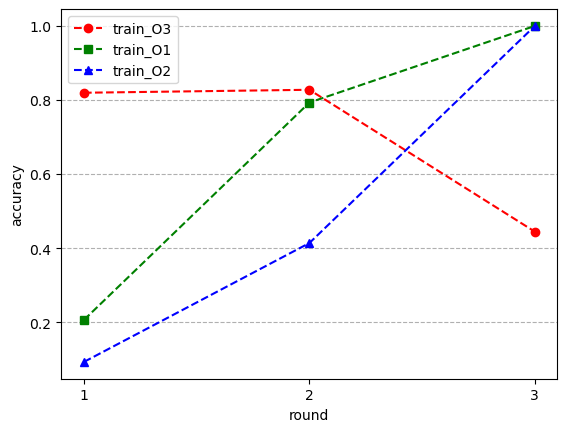

In [74]:
# train


plt.plot(rounds, train_accuracy_Y3, marker='o', linestyle='--',  label='train_O3', color='red')
plt.plot(rounds, train_accuracy_Y1, marker='s', linestyle='--',  label='train_O1', color='green')
plt.plot(rounds, train_accuracy_Y2, marker='^', linestyle='--',  label='train_O2', color='blue')

plt.xlabel('round')
plt.ylabel('accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(linestyle='--', axis='y')

plt.show()

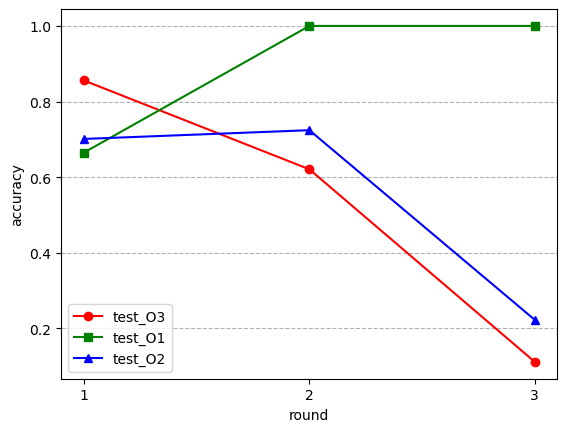

In [75]:
# test
plt.plot(rounds, test_accuracy_Y3, marker='o', label='test_O3', color='red')
plt.plot(rounds, test_accuracy_Y1, marker='s', label='test_O1', color='green')
plt.plot(rounds, test_accuracy_Y2, marker='^', label='test_O2', color='blue')

plt.xlabel('round')
plt.ylabel('accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(linestyle='--', axis='y')

plt.show()

## 5. Validation result with train and test dataset

In [137]:
# data
# train, test data
Path = './Data/ObservedData/test_trainData/'

trainY1 = np.loadtxt(Path + "train_data_forY1_80.txt")
trainY2 = np.loadtxt(Path + "train_data_forY2_80.txt")
trainY3 = np.loadtxt(Path + "train_data_forY3_80.txt")

testY1 = np.loadtxt(Path + "test_data_forY1_20.txt")
testY2 = np.loadtxt(Path + "test_data_forY2_20.txt")
testY3 = np.loadtxt(Path + "test_data_forY3_20_2.txt")

In [138]:
# observed data -> doulbe to make smooth graph (do not affect the result)
testY1_2 = testY1*2
testY2_2 = testY2*2
testY3_2 = testY3*2
trainY1_2 = trainY1*2
trainY2_2 = trainY2*2
trainY3_2 = trainY3*2

In [210]:
import warnings
warnings.filterwarnings(action='ignore') 

round_path = './Data/simulData/runWithCalibratedParameters/rounds/'
# -> simulation result with calibrated parameters from each round
y1_values_round1 = pd.read_csv(round_path + 'y1_values_round1.txt', squeeze=True)
y2_values_round1 = pd.read_csv(round_path + 'y2_values_round1.txt', squeeze=True)
y3_values_round1 = pd.read_csv(round_path + 'y3_values_round1.txt', squeeze=True)

### 5.1 round 1

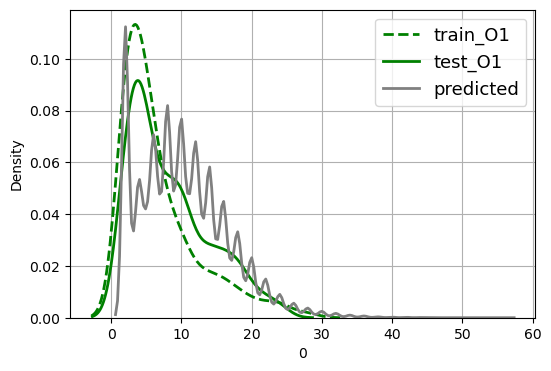

In [206]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
# 각 열의 각 인덱스별 값들의 평균 계산
# result_1['y1_sorted'] = result_1['y1'].apply(lambda x: sorted(x))
# means_y1_1 = np.mean(result_1['y1_sorted'].tolist(), axis=0)
# sns.kdeplot(means_y1_1, lw=2, color='green')
# sns.kdeplot(y1_values_flat, lw=2, color='blue')
kde_plot = sns.kdeplot(trainY1_2, lw =2, color = 'green', label = 'train_O1')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY1_2, lw =2, color = 'green', label = 'test_O1')  # 선 그래프 그리기
sns.kdeplot(y1_values_round1, lw=2, color = 'grey', label = 'predicted')
plt.grid()
plt.legend(fontsize = 13)

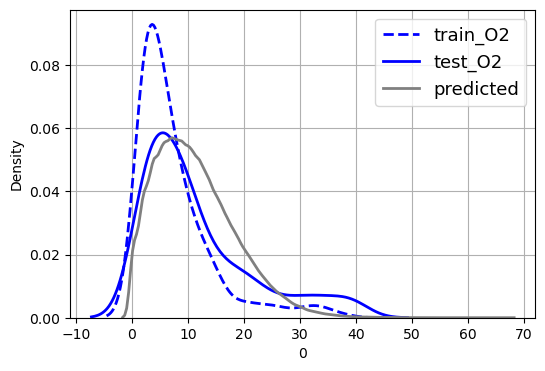

In [213]:
fig = plt.figure(figsize=(6, 4))
kde_plot = sns.kdeplot(trainY2_2, lw =2, color = 'blue', label = 'train_O2')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY2_2, lw =2, color = 'blue', label = 'test_O2')  # 선 그래프 그리기
sns.kdeplot(y2_values_round1, lw=2, color = 'grey', label = 'predicted')
plt.grid()
plt.legend(fontsize = 13)

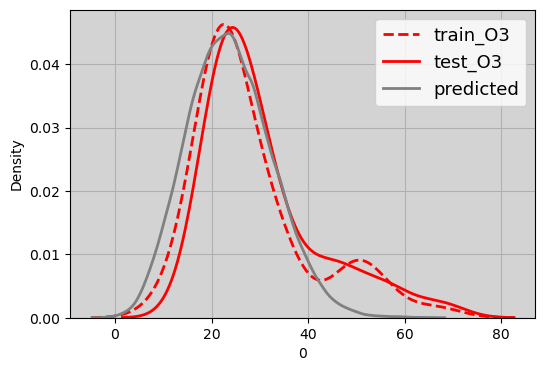

In [214]:
fig, ax = plt.subplots(figsize=(6, 4))

kde_plot = sns.kdeplot(trainY3_2, lw =2, color = 'red', label = 'train_O3')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY3_2, lw =2, color = 'red', label = 'test_O3')  # 선 그래프 그리기
sns.kdeplot(y3_values_round1, lw=2, color = 'grey', label = 'predicted')
plt.grid()
plt.legend(fontsize = 13)
ax.set_facecolor('lightgrey')

### 5.2 round 2

In [238]:
round_path = './Data/simulData/runWithCalibratedParameters/rounds/'
# -> simulation result with calibrated parameters from each round
y1_values_round2 = pd.read_csv(round_path + 'y1_values_round2.txt', squeeze=True)
y2_values_round2 = pd.read_csv(round_path + 'y2_values_round2.txt', squeeze=True)
y3_values_round2 = pd.read_csv(round_path + 'y3_values_round2.txt', squeeze=True)

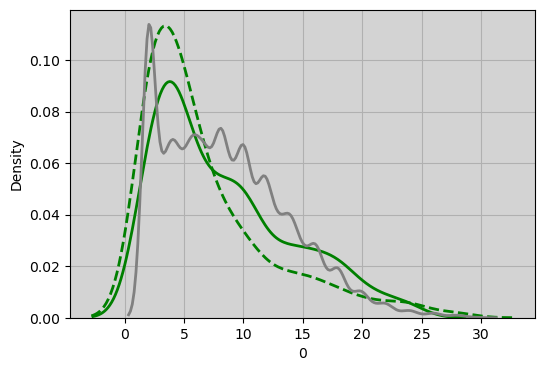

In [239]:
y1_values_round2 = y1_values_round2[y1_values_round2 < 30] # remove outlier

fig, ax = plt.subplots(figsize=(6, 4))
kde_plot = sns.kdeplot(trainY1_2, lw =2, color = 'green', label = 'train_O1')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY1_2, lw =2, color = 'green', label = 'test_O1')  # 선 그래프 그리기
sns.kdeplot(y1_values_round2, lw=2, color = 'grey', label = 'predicted')
plt.grid()

ax.set_facecolor('lightgrey')

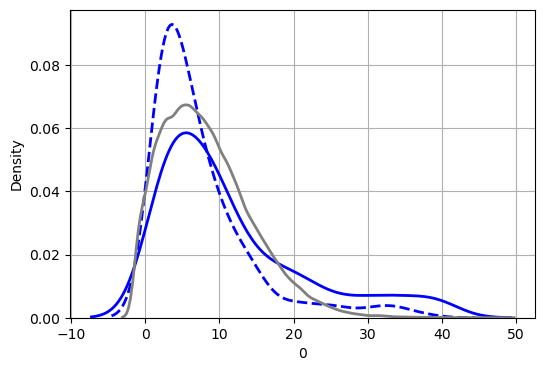

In [240]:
fig = plt.figure(figsize=(6, 4))

kde_plot = sns.kdeplot(trainY2_2, lw =2, color = 'blue', label = 'train_O2')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY2_2, lw =2, color = 'blue', label = 'test_O2')  # 선 그래프 그리기
sns.kdeplot(y2_values_round2, lw=2, color = 'grey', label = 'predicted')
plt.grid()

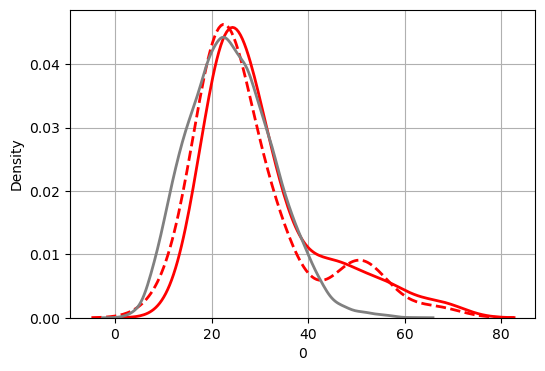

In [241]:
fig = plt.figure(figsize=(6, 4))

kde_plot = sns.kdeplot(trainY3_2, lw =2, color = 'red', label = 'train_O3')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY3_2, lw =2, color = 'red', label = 'test_O3')  # 선 그래프 그리기
sns.kdeplot(y3_values_round2, lw=2, color = 'grey', label = 'predicted')
plt.grid()

### ### 5.3 round 3

In [246]:
round_path = './Data/simulData/runWithCalibratedParameters/rounds/'
# -> simulation result with calibrated parameters from each round
y1_values_round3 = pd.read_csv(round_path + 'y1_values_round3.txt', squeeze=True)
y2_values_round3 = pd.read_csv(round_path + 'y2_values_round3.txt', squeeze=True)
y3_values_round3 = pd.read_csv(round_path + 'y3_values_round3.txt', squeeze=True)

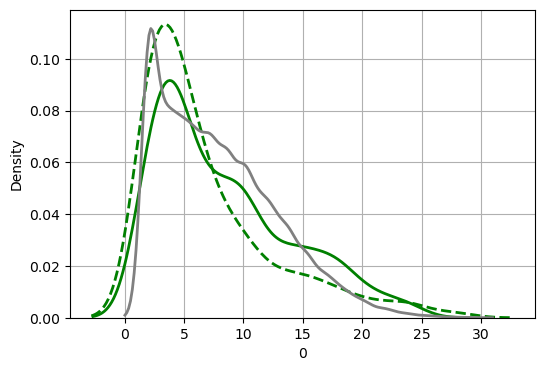

In [247]:
y1_values_round3 = y1_values_round3[y1_values_round3 < 30] # remove outlier

fig = plt.figure(figsize=(6, 4))
kde_plot = sns.kdeplot(trainY1_2, lw =2, color = 'green', label = 'train_O1')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY1_2, lw =2, color = 'green', label = 'test_O1')  # 선 그래프 그리기
sns.kdeplot(y1_values_round3, lw=2, color = 'grey', label = 'predicted')
plt.grid()

<Figure size 600x400 with 0 Axes>

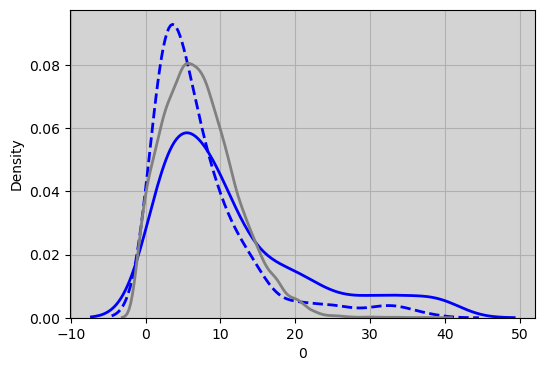

In [248]:
fig = plt.figure(figsize=(6, 4))

fig, ax = plt.subplots(figsize=(6, 4))
kde_plot = sns.kdeplot(trainY2_2, lw =2, color = 'blue', label = 'train_O2')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY2_2, lw =2, color = 'blue', label = 'test_O2')  # 선 그래프 그리기
sns.kdeplot(y2_values_round3, lw=2, color = 'grey', label = 'predicted')
plt.grid()

ax.set_facecolor('lightgrey')

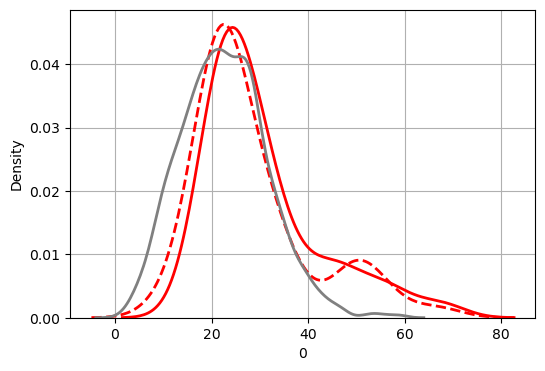

In [250]:
fig = plt.figure(figsize=(6, 4))

kde_plot = sns.kdeplot(trainY3_2, lw =2, color = 'red', label = 'train_O3')  # 선 그래프 그리기
kde_plot.lines[0].set_linestyle("--")
sns.kdeplot(testY3_2, lw =2, color = 'red', label = 'test_O3')  # 선 그래프 그리기
sns.kdeplot(y3_values_round3, lw=2, color = 'grey', label = 'predicted')
plt.grid()